# Multi-Agent System with LangGraph
In multi-agent systems, agents interact through handoffs, a mechanism that determines which agent receives control and what data is transferred to them.

Popular multi-agent architectures include:

-  **Supervisor:** A central supervisor agent oversees individual agents, managing all communication and task delegation. It decides which agent to activate based on the current context and task needs.
-  **Swarm:** Agents dynamically transfer control to one another based on their expertise. The system tracks the last active agent to ensure subsequent interactions continue with that agent.

**Overview of the `multi_agent_prebuilt.py` script:**

This script showcases three distinct approaches to building multi-agent systems:
1. **Supervisor Pattern:** A central supervisor agent assigns tasks to specialized agents.
2. **Swarm Pattern:** Agents directly pass tasks to each other as needed.
3. **Custom Handoffs:** A detailed implementation of task handoffs between agents.

In [95]:
# Import the os module to interact with the operating system, used here for environment variables.
import os
from dotenv import load_dotenv
from rich import print
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from langgraph_supervisor import create_supervisor
from IPython.display import Image, display

load_dotenv()

True

## Section 1: Supervisor Multi-Agent System

This example demonstrates a supervisor-worker architecture. A `supervisor` agent receives a user request and routes it to the appropriate specialized agent (`flight_assistant` or `hotel_assistant`).

**Code Logic:**
1.  **Tool Definition:** Simple functions `book_hotel` and `book_flight` are defined as tools for the agents.
2.  **Agent Creation:** Two `create_react_agent` instances are created. Each agent is specialized for a single task (booking flights or hotels) and is given access to the relevant tool.
3.  **Supervisor Creation:** `create_supervisor` is used to create a managing agent that orchestrates the two specialized agents.
4.  **Execution:** The system is run by streaming a user request through the compiled supervisor graph.

In [90]:
# Define a tool function for booking a hotel.
# It takes the hotel name as input and returns a confirmation message.
def book_hotel(hotel_name: str):
    """Book a hotel"""
    # This is a mock function; in a real application, this would
    # interact with a hotel booking API.
    return f'Successfully booked a stay at {hotel_name}.'


# Define a tool function for booking a flight.
# It takes departure and arrival airports and returns a confirmation.
def book_flight(from_airport: str, to_airport: str):
    """Book a flight"""
    # This is a mock function; in a real application, this would
    # interact with a flight booking API.
    return f'Successfully booked a flight from {from_airport} to {to_airport}.'

In [91]:
# Create the first specialized agent for booking flights.
# The create_react_agent function initializes an agent that can reason and act.
flight_assistant = create_react_agent(
    # The language model that powers the agent's reasoning.
    model=ChatOpenAI(model='gpt-4o-mini', max_tokens=500),
    # The list of tools the agent can use. This agent can only book flights.
    tools=[book_flight],
    # The system prompt that defines the agent's role and personality.
    prompt='You are a flight booking assistant. Help users book flights.',
    # A unique name for the agent, used for routing and identification.
    name='flight_assistant',
)


# Create the second specialized agent for booking hotels.
hotel_assistant = create_react_agent(
    model=ChatOpenAI(model='gpt-4o-mini', max_tokens=500),
    # This agent can only use the book_hotel tool.
    tools=[book_hotel],
    # The specific prompt for the hotel assistant.
    prompt='You are a hotel booking assistant. Help users book hotels.',
    # A unique name for the hotel agent.
    name='hotel_assistant',
)

In [92]:
# Create the supervisor agent that will manage the specialized agents.
# The create_supervisor function wires together the agents and a routing mechanism.
from litellm import max_tokens


supervisor = create_supervisor(
    # A list of the worker agents that the supervisor can delegate tasks to.
    agents=[flight_assistant, hotel_assistant],
    # The language model for the supervisor's decision-making.
    model=ChatOpenAI(model='gpt-4o-mini', max_tokens=500),
    # The system prompt for the supervisor, defining its role as a manager.
    prompt='You manage hotel and flight booking assistants. Assign work to them.',
    # Compile the supervisor graph into a runnable LangGraph object.
).compile()

Subgraph structure:

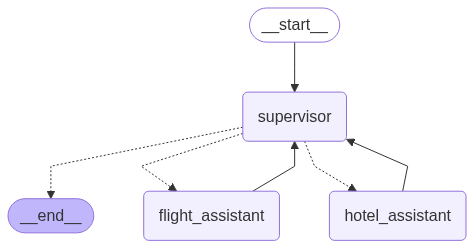

In [ ]:
# Print a header to indicate that the graph structure is being displayed.
print('Subgraph structure:')
try:
    display(Image(supervisor.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
# Print a header for the supervisor example output.
print('=== SUPERVISOR EXAMPLE ===')

# Stream the output from the supervisor graph for a given user request.
# The `stream` method allows processing the output as it's generated.
# `debug=True` provides verbose logging of the internal steps.
for chunk in supervisor.stream(
    # The input to the graph is a dictionary with a 'messages' key.
    {'messages': [{'role': 'user', 'content': 'Book a flight from LAX to NYC'}]},
    debug=True,
):
    # Check if the chunk contains any data before printing.
    if chunk:
        # Print a separator for readability.
        print('-' * 60)
        # Print the content of the current chunk.
        print(f'Chunk: {chunk}')
        # The original print(chunk) is commented out, but can be used for raw output.
        # print(chunk)

=== SUPERVISOR EXAMPLE ===

[values] {'messages': [HumanMessage(content='Book a flight from LAX to NYC', additional_kwargs={}, response_metadata={}, id='169d8f84-b155-46a2-bed3-cae573369f17')]}
[updates] {'supervisor': {'messages': [HumanMessage(content='Book a flight from LAX to NYC', additional_kwargs={}, response_metadata={}, id='169d8f84-b155-46a2-bed3-cae573369f17'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lXIlVAmPbCkVc5Agk4jrfXi9', 'function': {'arguments': '{}', 'name': 'transfer_to_flight_assistant'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 88, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk61D3QXfmMceHiZIMveuvrqbaF', 'service_

------------------------------------------------------------

Chunk: {'supervisor': {'messages': [HumanMessage(content='Book a flight from LAX to NYC', additional_kwargs={}, 
response_metadata={}, id='169d8f84-b155-46a2-bed3-cae573369f17'), AIMessage(content='', 
additional_kwargs={'tool_calls': [{'id': 'call_lXIlVAmPbCkVc5Agk4jrfXi9', 'function': {'arguments': '{}', 'name': 
'transfer_to_flight_assistant'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': 
{'completion_tokens': 14, 'prompt_tokens': 88, 'total_tokens': 102, 'completion_tokens_details': 
{'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 
'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 
'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk61D3QXfmMceHiZIMveuvrqbaF', 'service_tier': 'default', 
'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', 
id='run--d298bbd2-5f26-4c86-9bb2-34e8d66c813b-0', tool_calls=[{'name': 'transfer_to_flight_assistant', 'args': {}, 
'id': 'call_lXIlVAmPbCkVc5Agk4jrfXi9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 88, 'output_tokens': 
14, 'total_tokens': 102, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0,
'reasoning': 0}}), ToolMessage(content='Successfully transferred to flight_assistant', 
name='transfer_to_flight_assistant', id='6ff35518-d7c2-42c4-a7ae-7a350459c6e7', 
tool_call_id='call_lXIlVAmPbCkVc5Agk4jrfXi9')]}}

[values] {'messages': [HumanMessage(content='Book a flight from LAX to NYC', additional_kwargs={}, response_metadata={}, id='169d8f84-b155-46a2-bed3-cae573369f17'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lXIlVAmPbCkVc5Agk4jrfXi9', 'function': {'arguments': '{}', 'name': 'transfer_to_flight_assistant'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 88, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk61D3QXfmMceHiZIMveuvrqbaF', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run--d298bbd2-5f26-4c86-9bb2-34e8d66c813b-0', tool_calls=[{'name': 'transfer_to_flight_assi

------------------------------------------------------------

Chunk: {'flight_assistant': {'messages': [AIMessage(content='Your flight from LAX to NYC has been successfully 
booked! If you need any more assistance, feel free to ask.', additional_kwargs={'refusal': None}, 
response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 153, 'total_tokens': 178, 
'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 
'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 
'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk8nnmRNVn1wOlXprK0XXXRrPKP', 
'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, name='flight_assistant', 
id='run--25fb4683-aca6-416b-aac3-26dd87e5e04a-0', usage_metadata={'input_tokens': 153, 'output_tokens': 25, 
'total_tokens': 178, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 
'reasoning': 0}}), AIMessage(content='Transferring back to supervisor', additional_kwargs={}, 
response_metadata={'__is_handoff_back': True}, name='flight_assistant', id='0e46f95d-ea1f-4b30-bd80-2d6ed4ee4695', 
tool_calls=[{'name': 'transfer_back_to_supervisor', 'args': {}, 'id': '13a73cf3-5609-47a4-8556-4065490f5091', 
'type': 'tool_call'}]), ToolMessage(content='Successfully transferred back to supervisor', 
name='transfer_back_to_supervisor', id='bb2c2693-0b84-48e0-a377-be757b2a1df1', 
tool_call_id='13a73cf3-5609-47a4-8556-4065490f5091')]}}

[values] {'messages': [HumanMessage(content='Book a flight from LAX to NYC', additional_kwargs={}, response_metadata={}, id='169d8f84-b155-46a2-bed3-cae573369f17'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lXIlVAmPbCkVc5Agk4jrfXi9', 'function': {'arguments': '{}', 'name': 'transfer_to_flight_assistant'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 88, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk61D3QXfmMceHiZIMveuvrqbaF', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run--d298bbd2-5f26-4c86-9bb2-34e8d66c813b-0', tool_calls=[{'name': 'transfer_to_flight_assi

------------------------------------------------------------

Chunk: {'supervisor': {'messages': [HumanMessage(content='Book a flight from LAX to NYC', additional_kwargs={}, 
response_metadata={}, id='169d8f84-b155-46a2-bed3-cae573369f17'), AIMessage(content='', 
additional_kwargs={'tool_calls': [{'id': 'call_lXIlVAmPbCkVc5Agk4jrfXi9', 'function': {'arguments': '{}', 'name': 
'transfer_to_flight_assistant'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': 
{'completion_tokens': 14, 'prompt_tokens': 88, 'total_tokens': 102, 'completion_tokens_details': 
{'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 
'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 
'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk61D3QXfmMceHiZIMveuvrqbaF', 'service_tier': 'default', 
'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', 
id='run--d298bbd2-5f26-4c86-9bb2-34e8d66c813b-0', tool_calls=[{'name': 'transfer_to_flight_assistant', 'args': {}, 
'id': 'call_lXIlVAmPbCkVc5Agk4jrfXi9', 'type': 'tool_call'}], usage_metadata={'input_tokens': 88, 'output_tokens': 
14, 'total_tokens': 102, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0,
'reasoning': 0}}), ToolMessage(content='Successfully transferred to flight_assistant', 
name='transfer_to_flight_assistant', id='6ff35518-d7c2-42c4-a7ae-7a350459c6e7', 
tool_call_id='call_lXIlVAmPbCkVc5Agk4jrfXi9'), AIMessage(content='Your flight from LAX to NYC has been successfully
booked! If you need any more assistance, feel free to ask.', additional_kwargs={'refusal': None}, 
response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 153, 'total_tokens': 178, 
'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 
'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 
'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk8nnmRNVn1wOlXprK0XXXRrPKP', 
'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, name='flight_assistant', 
id='run--25fb4683-aca6-416b-aac3-26dd87e5e04a-0', usage_metadata={'input_tokens': 153, 'output_tokens': 25, 
'total_tokens': 178, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 
'reasoning': 0}}), AIMessage(content='Transferring back to supervisor', additional_kwargs={}, 
response_metadata={'__is_handoff_back': True}, name='flight_assistant', id='0e46f95d-ea1f-4b30-bd80-2d6ed4ee4695', 
tool_calls=[{'name': 'transfer_back_to_supervisor', 'args': {}, 'id': '13a73cf3-5609-47a4-8556-4065490f5091', 
'type': 'tool_call'}]), ToolMessage(content='Successfully transferred back to supervisor', 
name='transfer_back_to_supervisor', id='bb2c2693-0b84-48e0-a377-be757b2a1df1', 
tool_call_id='13a73cf3-5609-47a4-8556-4065490f5091'), AIMessage(content='The flight from LAX to NYC has been 
booked. If you need any further assistance or details, just let me know!', additional_kwargs={'refusal': None}, 
response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 202, 'total_tokens': 228, 
'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 
'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 
'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk90hSLHkzruSfjeSdJRSjiIQ2y', 
'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, name='supervisor', 
id='run--f9dfcf11-e447-4f14-88e0-8da935d1eec3-0', usage_metadata={'input_tokens': 202, 'output_tokens': 26, 
'total_tokens': 228, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 
'reasoning': 0}})]}}

[values] {'messages': [HumanMessage(content='Book a flight from LAX to NYC', additional_kwargs={}, response_metadata={}, id='169d8f84-b155-46a2-bed3-cae573369f17'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lXIlVAmPbCkVc5Agk4jrfXi9', 'function': {'arguments': '{}', 'name': 'transfer_to_flight_assistant'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 88, 'total_tokens': 102, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCbk61D3QXfmMceHiZIMveuvrqbaF', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, name='supervisor', id='run--d298bbd2-5f26-4c86-9bb2-34e8d66c813b-0', tool_calls=[{'name': 'transfer_to_flight_assi

## Section 2: Swarm Multi-Agent System

This example showcases a swarm architecture where agents can directly hand off tasks to one another. This is useful for more collaborative workflows.

**Code Logic:**
1.  **Tool Definition:** Similar to the supervisor example, `book_hotel_swarm` and `book_flight_swarm` are defined.
2.  **Handoff Tool Creation:** `create_handoff_tool` is used to create special tools that allow one agent to transfer control to another.
3.  **Agent Creation:** Agents are created with both their primary tool and the handoff tools.
4.  **Swarm Creation:** `create_swarm` assembles the agents into a collaborative system. A `default_active_agent` is specified to handle the initial user request.
5.  **Execution:** The user request is streamed through the swarm.

In [ ]:
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent
from langgraph_swarm import create_swarm, create_handoff_tool

In [ ]:
# Define a tool for booking a hotel in the swarm example.
def book_hotel_swarm(hotel_name: str):
    """Book a hotel"""
    return f'Hotel booked: {hotel_name}'


# Define a tool for booking a flight in the swarm example.
def book_flight_swarm(from_airport: str, to_airport: str):
    """Book a flight"""
    return f'Flight booked: {from_airport} to {to_airport}'

In [ ]:
# Create a handoff tool that allows transferring a task to the hotel assistant.
# The `create_handoff_tool` function generates a tool that agents can call.
transfer_to_hotel = create_handoff_tool(
    # The name of the agent to hand off to.
    agent_name='hotel_assistant',
    # The description of the tool, which the agent's LLM will use to decide when to use it.
    description='Transfer to hotel booking assistant.',
)


# Create a similar handoff tool for transferring to the flight assistant.
transfer_to_flight = create_handoff_tool(
    agent_name='flight_assistant',
    description='Transfer to flight booking assistant.',
)

In [ ]:
# Create the flight assistant for the swarm.
flight_assistant_swarm = create_react_agent(
    model=ChatOpenAI(model='gpt-4o-mini', max_tokens=500),
    # This agent has its primary tool (book_flight_swarm) and a handoff tool.
    tools=[book_flight_swarm, transfer_to_hotel],
    prompt='You are a flight booking assistant.',
    name='flight_assistant',
)


# Create the hotel assistant for the swarm.
hotel_assistant_swarm = create_react_agent(
    model=ChatOpenAI(model='gpt-4o-mini', max_tokens=500),
    # This agent can book hotels and hand off to the flight assistant.
    tools=[book_hotel_swarm, transfer_to_flight],
    prompt='You are a hotel booking assistant.',
    name='hotel_assistant',
)

In [ ]:
print('Subgraph structure:')
try:
    display(Image(hotel_assistant_swarm.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
# Create the swarm by passing the list of agents.
# `create_swarm` wires them together so they can hand off tasks to each other.
# `default_active_agent` specifies which agent should receive the initial request.
swarm = create_swarm(
    agents=[flight_assistant_swarm, hotel_assistant_swarm], default_active_agent='flight_assistant'
).compile()

In [ ]:
# Print a header for the swarm example.
print('\n=== SWARM EXAMPLE ===')

# Stream the output from the swarm.
# The initial request is to book a hotel, which will go to the default 'flight_assistant'.
# The flight assistant should then use the `transfer_to_hotel` tool.
for chunk in swarm.stream({'messages': [{'role': 'user', 'content': 'Book a hotel at Marriott'}]}, debug=True):
    if chunk:
        print('-' * 60)
        print(f'Chunk: {chunk}')
        # print(chunk)

## Section 3: Custom Handoffs Implementation

This section provides a from-scratch implementation of handoffs, giving you complete control over agent interaction logic. It uses a `StateGraph` to define the workflow explicitly.

You can specify:
- **destination**: target agent to navigate to
- **payload**: information to pass to that agent

**Code Logic:**
1. **Tool Definition:** `book_hotel_custom` and `book_flight_custom` tools are defined.
2. **Custom Handoff Tool Factory:** The `create_handoff_tool` function generates a tool that returns a `Command` object when called. This `Command` instructs the graph to transition to a different agent node.
3. **Agent Definition:** Agents are created with their respective tools, including the custom handoff tools.
4. **Graph Building:** A `StateGraph` is constructed with agents added as nodes and an entry point (`START`) that directs initial requests to the `flight_assistant`.


In [ ]:
from typing import Annotated
from langchain_core.tools import tool, InjectedToolCallId
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent, InjectedState
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.types import Command

In [ ]:
# Define a custom tool for booking a hotel.
def book_hotel_custom(hotel_name: str):
    """Book a hotel"""
    return f'Custom hotel booking: {hotel_name}'


# Define a custom tool for booking a flight.
def book_flight_custom(from_airport: str, to_airport: str):
    """Book a flight"""
    return f'Custom flight booking: {from_airport} to {to_airport}'

In [ ]:
# This function is a factory for creating custom handoff tools.
def create_handoff_tool_custom(*, agent_name: str, description: str):
    # Generate a unique name for the tool based on the target agent.
    name = f'transfer_to_{agent_name}'

    # Use the @tool decorator to define the handoff tool.
    @tool(name, description=description)
    def handoff_tool(
        # Inject the current graph state into the tool call.
        state: Annotated[MessagesState, InjectedState],
        # Inject the ID of the tool call that triggered this.
        tool_call_id: Annotated[str, InjectedToolCallId],
    ) -> Command:
        # Create a tool message to record the handoff event.
        tool_message = {
            'role': 'tool',
            'content': f'Transferred to {agent_name}',
            'name': name,
            'tool_call_id': tool_call_id,
        }
        # Return a Command object to instruct the graph to transition.
        return Command(
            # The `goto` field specifies the next node to execute.
            goto=agent_name,
            # The `update` field modifies the state, adding the tool message.
            update={'messages': state['messages'] + [tool_message]},
            # `graph=Command.PARENT` indicates the command applies to the parent graph.
            graph=Command.PARENT,
        )

    return handoff_tool

In [ ]:
# Create the custom handoff tools using the factory function.
transfer_to_hotel_custom = create_handoff_tool_custom(
    agent_name='hotel_assistant',
    description='Transfer to hotel assistant.',
)

transfer_to_flight_custom = create_handoff_tool_custom(
    agent_name='flight_assistant',
    description='Transfer to flight assistant.',
)

In [ ]:
# Define the agents using the custom tools.
flight_assistant_custom = create_react_agent(
    model=ChatOpenAI(model='gpt-4o-mini', max_tokens=500),
    tools=[book_flight_custom, transfer_to_hotel_custom],
    prompt='You are a flight booking assistant.',
    name='flight_assistant',
)

hotel_assistant_custom = create_react_agent(
    model=ChatOpenAI(model='gpt-4o-mini', max_tokens=500),
    tools=[book_hotel_custom, transfer_to_flight_custom],
    prompt='You are a hotel booking assistant.',
    name='hotel_assistant',
)

In [ ]:
# Build the state graph manually. New way to define multi-agent workflows.
multi_agent_graph = (
    # Initialize a StateGraph with the MessagesState schema.
    StateGraph(MessagesState)
    # Add the flight assistant as a node in the graph.
    .add_node('flight_assistant', flight_assistant_custom)
    # Add the hotel assistant as another node.
    .add_node('hotel_assistant', hotel_assistant_custom)
    # Define the entry point of the graph. All requests will start at the flight assistant.
    .add_edge(START, 'flight_assistant')
    .compile()
)

In [ ]:
print('Subgraph structure:')
try:
    img = Image(multi_agent_graph.get_graph().draw_mermaid_png())
    display(img)
except Exception:
    pass

In [ ]:
# Print a header for the custom handoffs example.
print('\n=== CUSTOM HANDOFFS EXAMPLE ===')

# Stream the output from the custom graph.
for chunk in multi_agent_graph.stream(
    {'messages': [{'role': 'user', 'content': 'Book a flight from SFO to LAX'}]}, debug=True
):
    if chunk:
        print('-' * 60)
        print(f'Chunk: {chunk}')
        # print(chunk)

## Section 5: Conclusion

This notebook has demonstrated three powerful patterns for building multi-agent systems with LangGraph:

-   **Supervisor:** Ideal for hierarchical task delegation where a manager oversees workers.
-   **Swarm:** Suitable for collaborative environments where agents can pass tasks amongst themselves.
-   **Custom Handoffs:** Offers the most flexibility for designing complex, bespoke agent interactions.

**Potential Extensions:**

*   **Error Handling:** Implement more robust error handling within each agent.
*   **Dynamic Routing:** Add more complex conditional logic for routing tasks.
*   **State Management:** Enhance the state to carry more context between agent interactions.